In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
data = pd.read_csv('Dataset.csv')
data.head()

,red,green,blue,label
0,20,139,240,Blue
1,174,83,72,Brown
2,144,249,131,Green
3,168,25,156,Pink
4,30,182,136,Green


In [3]:
data.shape

(5052, 4)

In [4]:
data.describe()

,red,green,blue
count,5052.000000,5052.000000,5052.000000
mean,127.416073,126.316310,128.296912
std,73.958449,74.927131,74.174008
min,0.000000,0.000000,0.000000
25%,63.000000,60.000000,63.000000
50%,128.000000,127.000000,130.000000
75%,191.000000,192.000000,192.000000
max,255.000000,255.000000,255.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5052 entries, 0 to 5051
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   red     5052 non-null   int64 
 1   green   5052 non-null   int64 
 2   blue    5052 non-null   int64 
 3   label   5052 non-null   object
dtypes: int64(3), object(1)
memory usage: 158.0+ KB


In [6]:
import numpy as np
data['label'] = np.array([data['label']]).reshape(-1,1)

from sklearn.preprocessing import LabelEncoder
labelEncoder = LabelEncoder()
data['label'] = labelEncoder.fit_transform(data['label'])

In [7]:
data.head()

,red,green,blue,label
0,20,139,240,1
1,174,83,72,2
2,144,249,131,3
3,168,25,156,6
4,30,182,136,3


In [25]:
X = data.drop(columns=['label'])
Y= data['label']

In [26]:
from sklearn.model_selection import train_test_split
xTrain, xTest, yTrain, yTest = train_test_split(X, Y, test_size=0.2, random_state=30)

In [27]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy

In [28]:
model=Sequential([
    Dense(units=3, input_shape=(3,), activation='relu'),
    Dense(units=256, activation='relu'),
    Dense(units=128, activation='relu'),
    Dense(units=64, activation='relu'),
    Dense(units=11, activation='linear')
])

In [29]:
model.compile(optimizer=Adam(),
              loss=SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [30]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 3)                 12        
                                                                 
 dense_11 (Dense)            (None, 256)               1024      
                                                                 
 dense_12 (Dense)            (None, 128)               32896     
                                                                 
 dense_13 (Dense)            (None, 64)                8256      
                                                                 
 dense_14 (Dense)            (None, 11)                715       
                                                                 
Total params: 42,903
Trainable params: 42,903
Non-trainable params: 0
_________________________________________________________________


In [31]:
model.fit(xTrain, yTrain, validation_split=0.2, epochs=1000, batch_size=64, shuffle=True)

Epoch 1/1000
51/51 [==============================] - 1s 7ms/step - loss: 1.4710 - accuracy: 0.5371 - val_loss: 1.0464 - val_accuracy: 0.6267
Epoch 2/1000
51/51 [==============================] - 0s 2ms/step - loss: 1.0032 - accuracy: 0.6250 - val_loss: 1.0697 - val_accuracy: 0.5649
Epoch 3/1000
51/51 [==============================] - 0s 3ms/step - loss: 0.8598 - accuracy: 0.6547 - val_loss: 0.7444 - val_accuracy: 0.6551
Epoch 4/1000
51/51 [==============================] - 0s 5ms/step - loss: 0.7666 - accuracy: 0.6804 - val_loss: 0.6645 - val_accuracy: 0.7330
Epoch 5/1000
51/51 [==============================] - 0s 5ms/step - loss: 0.7235 - accuracy: 0.6937 - val_loss: 0.7129 - val_accuracy: 0.6848
Epoch 6/1000
51/51 [==============================] - 0s 5ms/step - loss: 0.7091 - accuracy: 0.7082 - val_loss: 0.6355 - val_accuracy: 0.7417
Epoch 7/1000
51/51 [==============================] - 0s 4ms/step - loss: 0.7074 - accuracy: 0.6968 - val_loss: 0.6132 - val_accuracy: 0.7281
Epoch 

In [32]:
model.save('ColorModel.h5')

In [33]:
model.evaluate(xTrain, yTrain)

127/127 [==============================] - 0s 1ms/step - loss: 0.3128 - accuracy: 0.8872


[0.3128422796726227, 0.8871566653251648]

In [34]:
model.evaluate(xTest, yTest)

32/32 [==============================] - 0s 1ms/step - loss: 0.6967 - accuracy: 0.8546


[0.6966720819473267, 0.8545994162559509]

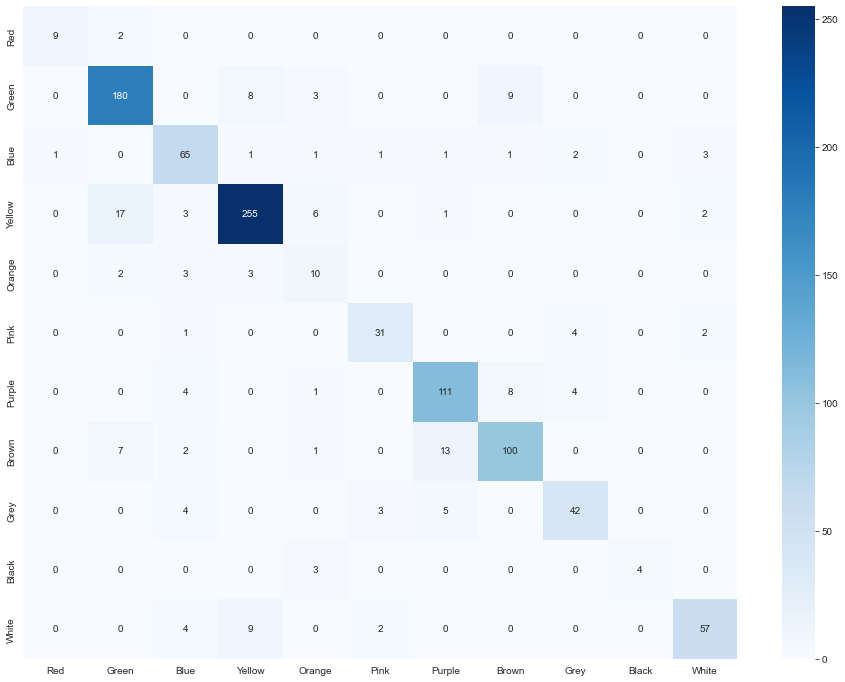

In [35]:
testPredictions = model.predict(xTest)
testPredictions = np.argmax(testPredictions, axis=1)

from sklearn.metrics import confusion_matrix
confusionMatrix = confusion_matrix(yTest, testPredictions)

import matplotlib.pyplot as plt
import seaborn as sns
f,ax = plt.subplots(figsize=(16,12))
categories = ['Red', 'Green', 'Blue', 'Yellow', 'Orange', 'Pink', 'Purple', 'Brown', 'Grey', 'Black', 'White']
sns.heatmap(confusionMatrix, annot=True, cmap='Blues', fmt='d', xticklabels = categories, yticklabels = categories)
plt.show()